In [30]:
pip install yfinance pandas matplotlib numpy



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import yfinance as yf  # Import Yahoo Finance API
import pandas as pd  # Import Pandas for data handling
import os  # Import os for path handling

# Define fund ticker symbol (e.g., "SPY" for S&P 500 ETF)
fund_ticker = "SPY"

# Fetch historical stock price data from Yahoo Finance
fund_data = yf.download(fund_ticker, start="2020-01-01", end="2024-01-01")

# Display first 5 rows of data
print(fund_data.head())

# Define a writable directory (e.g., home directory)
writable_directory = os.path.expanduser("~/")

# Save to CSV in the writable directory
csv_path = os.path.join(writable_directory, "SPY_prices.csv")
fund_data.to_csv(csv_path)

print(f"Data saved to {csv_path}")

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2020-01-02  301.194977  301.213537  299.025509  299.961913  59151200
2020-01-03  298.914154  300.054527  297.699623  297.755249  77709700
2020-01-06  300.054535  300.137973  297.013540  297.134071  55653900
2020-01-07  299.210846  299.961814  298.756536  299.479692  40496400
2020-01-08  300.805511  302.038574  299.155231  299.405545  68296000
Data saved to /Users/prathameshankaram/SPY_prices.csv


In [32]:
pip install scipy statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np  # For numerical calculations

# Convert columns to numeric, errors='coerce' will replace non-numeric values with NaN
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Print the columns to debug
print(f"Columns in CSV: {df.columns}")

# Ensure 'Date' column is present and set as index
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)
else:
    print("Error: 'Date' column not found in CSV.")
    # Handle the error as needed, e.g., exit or raise an exception

# Calculate daily returns if 'Close' column is present
if 'Close' in df.columns:
    df["Returns"] = df["Close"].pct_change()

    # Compute Sharpe Ratio
    risk_free_rate = 0.03 / 252  # Assume 3% annual risk-free rate, converted to daily
    sharpe_ratio = (df["Returns"].mean() - risk_free_rate) / df["Returns"].std()

    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
else:
    print("Error: 'Close' column not found in CSV.")

Columns in CSV: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Error: 'Date' column not found in CSV.
Sharpe Ratio: 0.03


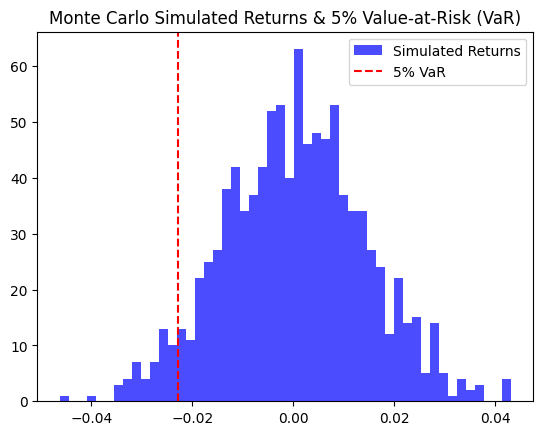

95% Value-at-Risk (VaR): -2.29%


In [34]:
import matplotlib.pyplot as plt

# Simulate 1,000 return scenarios based on historical mean & volatility
num_simulations = 1000
simulated_returns = np.random.normal(df["Returns"].mean(), df["Returns"].std(), num_simulations)

# Plot simulated returns distribution
plt.hist(simulated_returns, bins=50, alpha=0.7, color="blue", label="Simulated Returns")
plt.axvline(np.percentile(simulated_returns, 5), color="red", linestyle="dashed", label="5% VaR")
plt.legend()
plt.title("Monte Carlo Simulated Returns & 5% Value-at-Risk (VaR)")
plt.show()

# Compute 5% Value-at-Risk
VaR_95 = np.percentile(simulated_returns, 5)
print(f"95% Value-at-Risk (VaR): {VaR_95:.2%}")

In [35]:
import scipy.optimize as sco

# Ensure relevant columns are numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Drop rows with NaN values in relevant columns
df.dropna(subset=['Close', 'High', 'Low', 'Open', 'Volume'], inplace=True)

# Define portfolio weights (random initial values)
weights = np.random.random(4)
weights /= np.sum(weights)  # Normalize weights to sum to 1

# Define function to minimize portfolio volatility
def min_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(df[['Close', 'High', 'Low', 'Open']].cov(), weights)))

# Optimize for minimum volatility
constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(4))
optimized_weights = sco.minimize(min_volatility, weights, bounds=bounds, constraints=constraints)

print(f"Optimized Portfolio Weights: {optimized_weights.x}")

Optimized Portfolio Weights: [3.46944695e-18 1.00000000e+00 2.10870586e-16 0.00000000e+00]


/var/folders/xt/8hs7q3w57fbb0q777dqt_4800000gn/T/ipykernel_41373/996690139.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/Users/prathameshankaram/SPY_prices.csv", parse_dates=['Date'])


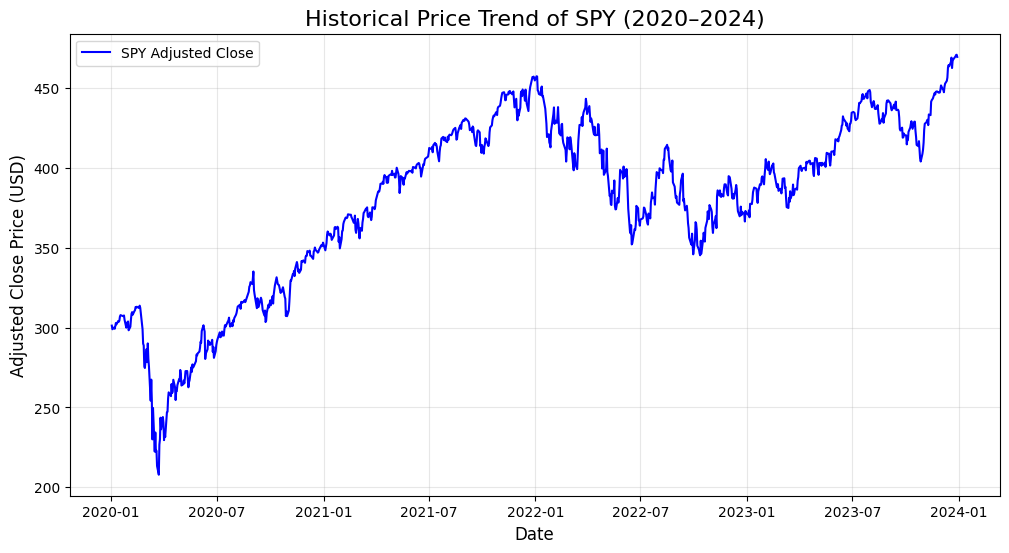

In [38]:
import matplotlib.pyplot as plt

# Load historical data
df = pd.read_csv("/Users/prathameshankaram/SPY_prices.csv", parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot Adjusted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="SPY Adjusted Close", color="blue")
plt.title("Historical Price Trend of SPY (2020–2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

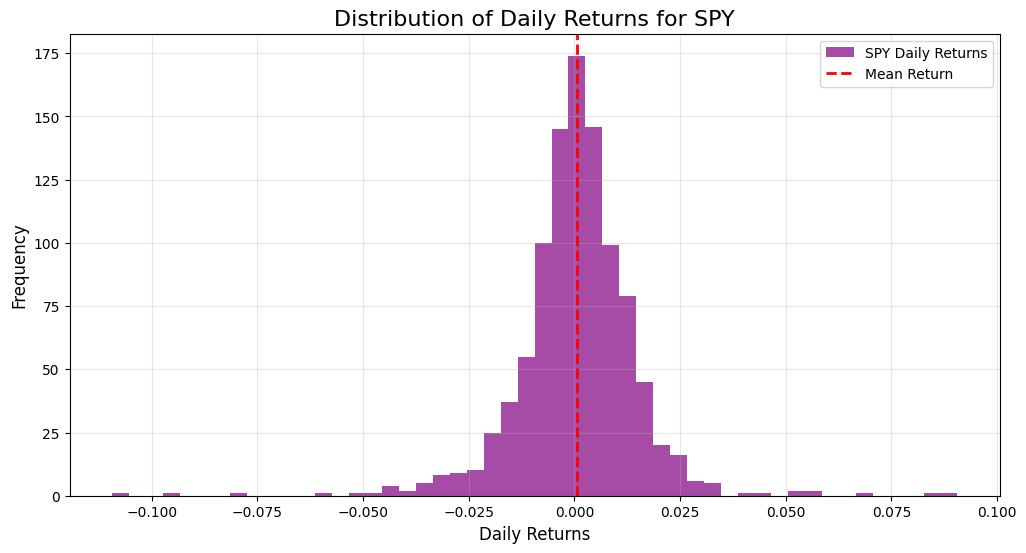

In [41]:
# Compute daily returns
df["Returns"] = df["Close"].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(12, 6))
plt.hist(df["Returns"].dropna(), bins=50, color="purple", alpha=0.7, label="SPY Daily Returns")
plt.axvline(df["Returns"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean Return")
plt.title("Distribution of Daily Returns for SPY", fontsize=16)
plt.xlabel("Daily Returns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

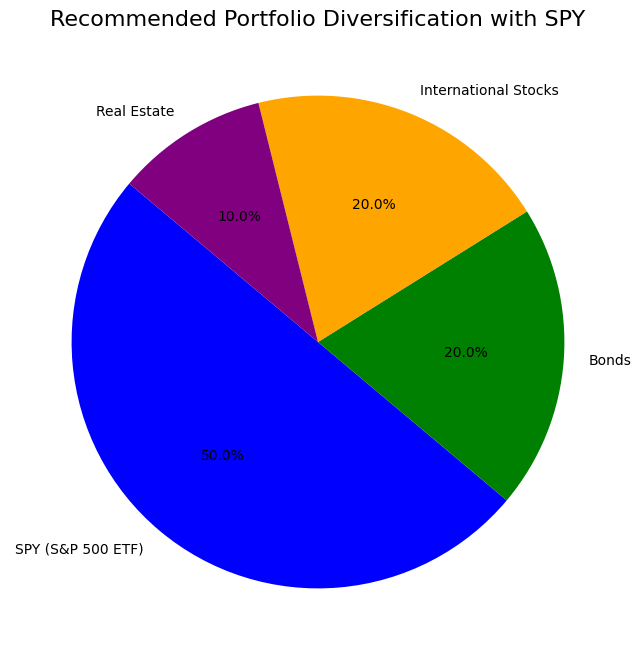

In [43]:
# Asset allocation percentages
labels = ["SPY (S&P 500 ETF)", "Bonds", "International Stocks", "Real Estate"]
sizes = [50, 20, 20, 10]  # Example allocation
colors = ["blue", "green", "orange", "purple"]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Recommended Portfolio Diversification with SPY", fontsize=16)
plt.show()

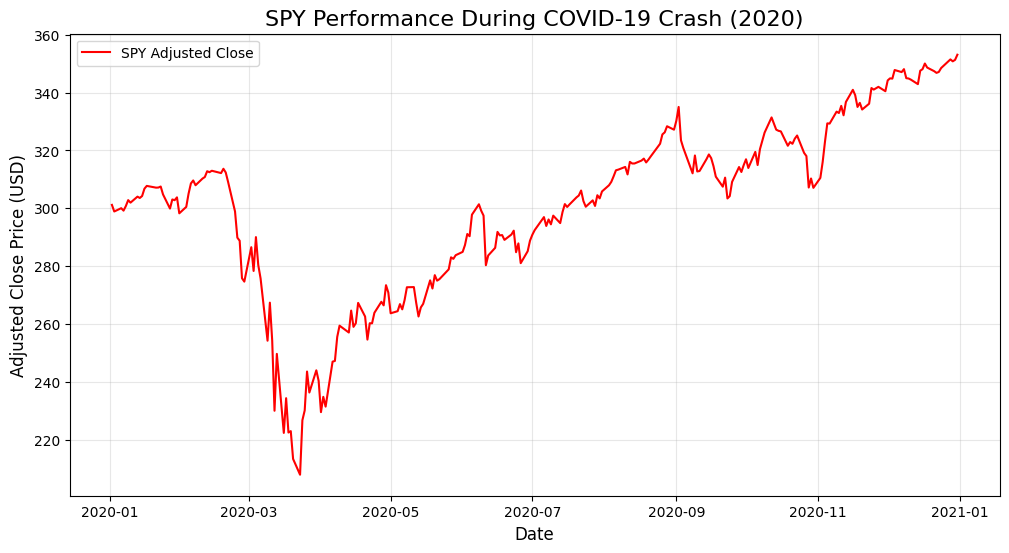

In [45]:
# Filter data for COVID-19 period
covid_data = df.loc["2020-01-01":"2020-12-31"]

# Plot SPY's price during the COVID-19 crash
plt.figure(figsize=(12, 6))
plt.plot(covid_data.index, covid_data["Close"], label="SPY Adjusted Close", color="red")
plt.title("SPY Performance During COVID-19 Crash (2020)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()